In [15]:
import torch
import torch.nn as nn 
from torch.utils.data import Dataset, DataLoader,TensorDataset
import  torchvision.transforms as transforms
import numpy as np
import pandas as pd
import utils

from os import listdir
from os.path import isfile, join
# import data_proses
import argparse
import yaml

from models.models import LSTMModel 
with open(r'/home/robotics20/Documents/rotem/new_code/config.yaml', 'r') as f:
    args = yaml.safe_load(f)

config = argparse.Namespace(**args)


df = pd.read_csv(r'/home/robotics20/Documents/rotem/new_code/data/data/16_Aug_2023_11_24_clean.csv')

In [16]:
df =df.rolling(window=config.window_size, axis=0).mean()
df = df.drop_duplicates().dropna().reset_index(drop=True)

df_tensor = torch.tensor(df[config.fmg_index].to_numpy()[:9900],dtype=torch.float32)

/tmp/ipykernel_2106058/4034897312.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['sesion_time_stamp'], dtype='object')
  df =df.rolling(window=config.window_size, axis=0).mean()


In [17]:
df_tensor.size()

torch.Size([9900, 27])

In [18]:
# Reshape data into sequences of length 20 with 9 features each
sequence_length = 20
num_features = len(config.fmg_index)
num_samples = df_tensor.size(0)
num_sequences = num_samples // sequence_length

# Reshape the data
sequenced_fmg = df_tensor[:num_sequences * sequence_length].view(num_sequences, sequence_length, num_features)

In [19]:
sequenced_fmg.size()


torch.Size([495, 20, 27])

In [20]:
model = LSTMModel(config)

In [8]:
sequenced_fmg[:5].shape

torch.Size([5, 20, 27])

In [44]:
model(sequenced_fmg[:5]).shape

torch.Size([5, 18])

In [ ]:
norm.to_numpy

In [45]:
norm,max,min = utils.min_max_normalize(df[config.first_positoin_label_inedx])

norm = torch.Tensor(norm.to_numpy())

In [46]:
# Reshape data into sequences of length 20 with 9 features each
sequence_length = 20
num_features = len(config.first_positoin_label_inedx)
num_samples = norm.size(0)
num_sequences = num_samples // sequence_length

# Reshape the data
norm = norm[:num_sequences * sequence_length].view(num_sequences, sequence_length, num_features)


In [50]:
norm.size(0)

498

In [51]:
unnorm = utils.min_max_unnormalize(norm,np.tile(min,(norm.size(0),norm.size(1),1)),np.tile(max,(norm.size(0),norm.size(1),1)))

In [67]:
unnorm[:1000,-1:].squeeze().shape


torch.Size([498, 12])

<AxesSubplot: >

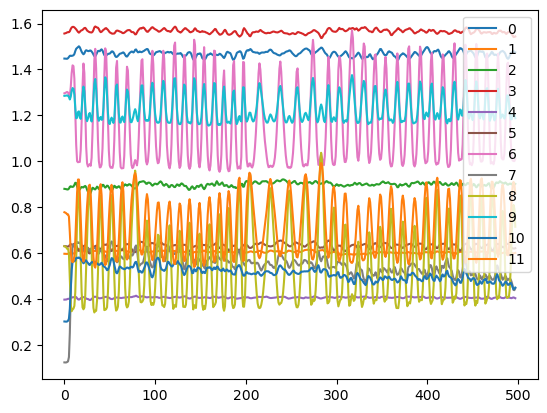

In [68]:
# Convert the PyTorch tensor to a NumPy array
numpy_array = unnorm[:1000,-1:].squeeze().numpy()

# Create a Pandas DataFrame from the NumPy array
data_frame = pd.DataFrame(numpy_array)

data_frame.plot()

<AxesSubplot: >

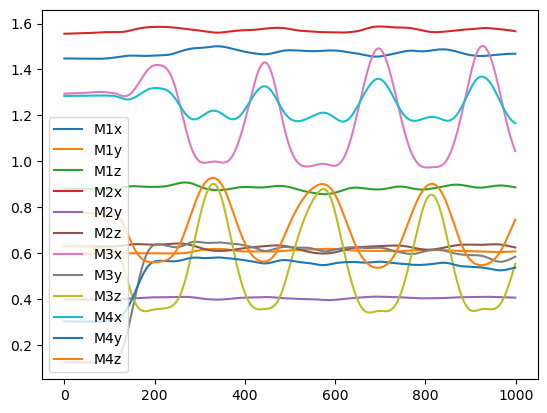

In [39]:
label = df[config.first_positoin_label_inedx]
label[:1000].plot()

In [ ]:
np.s